## 2020 MagIC Workshop PmagPy notebook demo



- Go to the jupyter-hub website to run this online, or put this notebook in some working directory.   

- Click on the cell below and then click on 'Run' from the menu above to import the desired functionality

In [1]:
# Import PmagPy modules
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert

# Import plotting modules
has_cartopy, Cartopy = pmag.import_cartopy() # import mapping module, if it is available
import matplotlib.pyplot as plt # our plotting buddy
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 

# Import more useful modules
import numpy as np # the fabulous NumPy package
import pandas as pd # and  Pandas for data wrangling
import os # some useful operating system functions
from importlib import reload # for reloading module if they get changed after initial import
from IPython.display import Image
import imageio # for making animations

# import wget for downloading MagIC data files from the database
try:
    import wget
except: # If this is not installed (not standard anaconda), install it, then import
    !pip install wget
    import wget


In [2]:
# set up the directory structure for this notebook, if not already present:
dirs=os.listdir() # get a list of directories in this one
if 'MagIC_example_1' not in dirs:
    os.mkdir("MagIC_example_1")
if 'MagIC_example_2' not in dirs:
    os.mkdir("MagIC_example_2")
if 'MagIC_example_3' not in dirs:
    os.mkdir("MagIC_example_3")

## Overview of demonstration

This notebook has three exercises that demonstrate various aspects of the PmagPy software.  
- Exercise 1 looks at a typical "directional" data set and shows how to make useful plots like the equal area projection, maps of VGPs and basemaps of site locations.  
- Exercise 2 shows how to get geomagnetic vectors from IGRF-like tables and several ways of looking at the data through time and space. 
- Exercise 3 considers directional (polariy) and anisotropy data as a function of depth in an IODP core.  

When you have worked through these examples, check out the other PmagPy notebooks in the software distribution. 

## Exercise 1

- Hunt around the earthref.org/MagIC/search page for a data set you would like to look at. We will use the data of Behar et al., 2019,  DOI: 10.1029/2019GC008479 for this exercise. 
- Download the associated datafile, magic_contribution_16676.txt,  using _wget()_ and move it to the working directory, MagIC_example_1
- unpack it with _ipmag.download_magic()_
- Use PmagPy functions to make the following plots:
    - use _ipmag.eqarea_magic()_ to make an equal area plot
    - use _ipmag.vgpmap_magic()_ to make a map of VGPs
    - use _ipmag.reversal_test_bootstrap()_ for a bootstrap reversals test
    - use _pmagplotlib.plot_map()_ to make a site map

In [6]:
dir_path='MagIC_example_1' # set the path to the correct working directory
# First get the file from MagIC
wget.download('https://earthref.org/MagIC/download/16676/magic_contribution_16676.txt')
# and move it into the working directory:
os.rename('magic_contribution_16676.txt', dir_path+'/magic_contribution_16676.txt')


To understand what a particular PmagPy function expects as input and delivers, use the Python _help_ function

In [7]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile=None, dir_path='.', input_dir_path='', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False, txt='', excel=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is IF that location is different from
    dir_path).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir_path : str, default ""
        path for intput file if different from output_dir_path (default is same)
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose out

In [8]:
# unpack the downloaded file with the ipmag function download_magic()
ipmag.download_magic('magic_contribution_16676.txt',dir_path=dir_path,print_progress=False)


1  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/contribution.txt
1  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/locations.txt
91  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/sites.txt
611  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/samples.txt
676  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/specimens.txt
6297  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/measurements.txt
1  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/criteria.txt
91  records written to file  /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/ages.txt


True

### Equal area net example
- use ipmag.eqarea_magic()

In [9]:
# first get help on how to use it:
help(ipmag.eqarea_magic)

Help on function eqarea_magic in module pmagpy.ipmag:

eqarea_magic(in_file='sites.txt', dir_path='.', input_dir_path='', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', plot_by='all', crd='g', ignore_tilt=False, save_plots=True, fmt='svg', contour=False, color_map='coolwarm', plot_ell='', n_plots=5, interactive=False, contribution=None, source_table='sites', image_records=False)
    makes equal area projections from declination/inclination data
    
    Parameters
    ----------
    in_file : str, default "sites.txt"
    dir_path : str
        output directory, default "."
    input_dir_path : str
        input file directory (if different from dir_path), default ""
    spec_file : str
        input specimen file name, default "specimens.txt"
    samp_file: str
        input sample file name, default "samples.txt"
    site_file : str
        input site file name, default "sites.txt"
    loc_file : str
        input location file nam

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org
'table_column' <class 'KeyError'>
-W- File /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/criteria.txt is missing required information
91  sites records read in
All


(True, [])

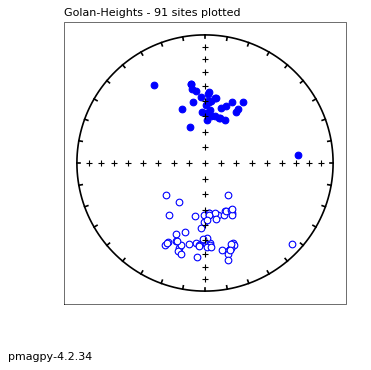

In [10]:
# now we do it for real:
ipmag.eqarea_magic(dir_path=dir_path,save_plots=False)

### Map of VGPs
- use ipmag.vgpmap_magic() to plot the VGPs from the same data

In [11]:
# get help message for vgpmap_magic
help(ipmag.vgpmap_magic)

Help on function vgpmap_magic in module pmagpy.ipmag:

vgpmap_magic(dir_path='.', results_file='sites.txt', crd='', sym='ro', size=8, rsym='g^', rsize=8, fmt='pdf', res='c', proj='ortho', flip=False, anti=False, fancy=False, ell=False, ages=False, lat_0=0, lon_0=0, save_plots=True, interactive=False, contribution=None, image_records=False)
    makes a map of vgps and a95/dp,dm for site means in a sites table
    
    Parameters
    ----------
    dir_path : str, default "."
        input directory path
    results_file : str, default "sites.txt"
        name of MagIC format sites file
    crd : str, default ""
       coordinate system [g, t] (geographic, tilt_corrected)
    sym : str, default "ro"
        symbol color and shape, default red circles
        (see matplotlib documentation for more color/shape options)
    size : int, default 8
        symbol size
    rsym : str, default "g^"
        symbol for plotting reverse poles
        (see matplotlib documentation for more color/sha

'table_column' <class 'KeyError'>
-W- File /Users/ltauxe/Meetings_2020/MagIC_Workshop/MagIC_example_1/criteria.txt is missing required information


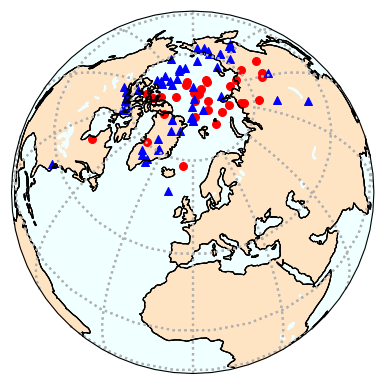

In [12]:
dir_path='MagIC_example_1' # set the path to your working directory
ipmag.vgpmap_magic(dir_path=dir_path,size=50,flip=True,save_plots=False,lat_0=60,rsym='b^',rsize=50)

### Bootstrap reversals test
- use ipmag.reversal_test_bootstrap() to do the reversals test

In [13]:
help(ipmag.reversal_test_bootstrap)

Help on function reversal_test_bootstrap in module pmagpy.ipmag:

reversal_test_bootstrap(dec=None, inc=None, di_block=None, plot_stereo=False, save=False, save_folder='.', fmt='svg')
    Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
    determine whether two populations of directions could be from an antipodal
    common mean.
    
    Parameters
    ----------
    dec: list of declinations
    inc: list of inclinations
        or
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')
    
    Returns
    -------
    plots : Plots of the cumulative d

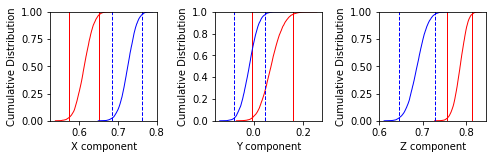

In [14]:
# read in the data into a Pandas DataFrame
dir_path='MagIC_example_1' # set the path to your working directory
sites_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
# pick out the declinations and inclinations
decs=sites_df.dir_dec.values
incs=sites_df.dir_inc.values
# call the function
ipmag.reversal_test_bootstrap(dec=decs,inc=incs,plot_stereo=False)

### Make a site map
- use pmagplotlib.plot_map() to make a site map

In [15]:
help(pmagplotlib.plot_map)

Help on function plot_map in module pmagpy.pmagplotlib:

plot_map(fignum, lats, lons, Opts)
    makes a cartopy map  with lats/lons
    Requires installation of cartopy
    
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            proj : projection [supported cartopy projections:
                pc = Plate Carree
                aea = Albers Equal Area
                aeqd = Azimuthal Equidistant
                lcc = Lambert Conformal
                lcyl = Lambert Cylindrical
                merc = Mercator
                mill = Miller Cylindrical
                moll = Mollweide [default]
                ortho = Orthographic
                robin = Robinson
                sinu = Sinusoidal
                stere = Stereographic
                tmerc = Transverse Mercator
                utm = UTM [set zone and south 

NB: the most recent PmagPy version fixes the scale issue - but it is SLOW at high resolution... so set Opts\['res'\] to 'c' for crude for a quick look.  if you want to be dazzled - set it to 'h' but be prepared to wait for a while...  'i' for intermediate is probably good enough for most purposes (50m resolution)

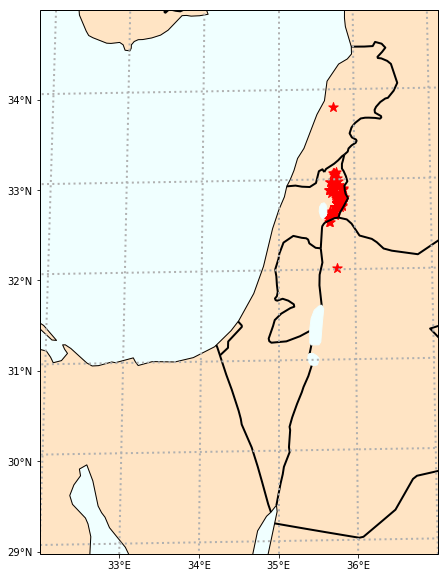

In [16]:
dir_path='MagIC_example_1' # set the path to your working directory
# read in the data file:
site_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
# pick out the longitudes and latitudes
lons=site_df['lon'].values
lats=site_df['lat'].values
# set some options
Opts={}
Opts['sym']='r*' # sets the symbol to white dots
Opts['symsize']=100 # sets symbol size to 3 pts
Opts['proj']='lcc' # Lambert Conformal projection
Opts['pltgrid']=True
Opts['lat_0']=33
Opts['lon_0']=35
Opts['latmin']=29
Opts['latmax']=35
Opts['lonmin']=32
Opts['lonmax']=37
Opts['gridspace']=1
Opts['details']={}
Opts['details']['coasts']=True
Opts['details']['ocean']=True
Opts['details']['countries']=True
Opts['global']=False
Opts['res']='i'
plt.figure(1,(10,10)) # optional - make a map

pmagplotlib.plot_map(1, lats, lons, Opts)


## Exercise 2: 
- use _pmag.pinc()_ to calculate the GAD inclination for a  particular latitude (e.g., 33)
- use _ipmag.igrf()_ and _ipmag.igrf_print()_ to get values of the field for a specific place (e.g., San Diego at lon=-117,lat=33,alt=0) and date (2019)
- make a plot of declination, inclination, B for a specific place and range of dates
- use _pmag.do_mag_map()_ and _pmagplotlib.plot_mag_map()_ to make a map of the field at a specific date (2019)
- make a movie of the field for the last 1000 years using the cals10k.2 model of Constable et al. (2016)

In [7]:
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    lat : either a single value or an array of latitudes
    
    Returns
    -------
    
    array of inclinations



In [8]:
gad_inc=pmag.pinc(33)
print(gad_inc)

52.406157522519074


In [9]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (Common Era)
        altitude is in kilometers
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            wit

In [11]:
date,lat,lon,alt=2019.9,33,-117,0
local=ipmag.igrf([date, alt, lat, lon])
ipmag.igrf_print(local)

Declination: 11.376
Inclination: 58.140
Intensity: 46239.890 nT


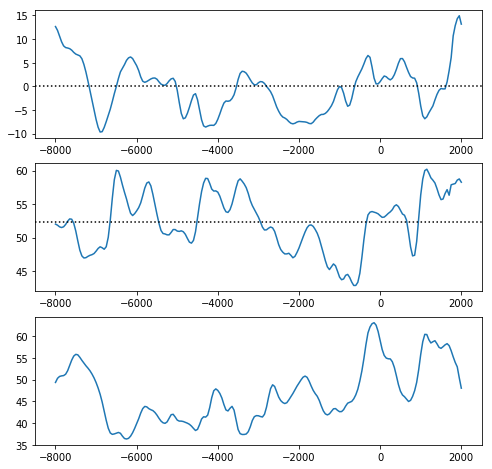

In [2]:
mod='cals10k.2'
lat,lon,alt=33,-117,0
gad_inc=pmag.pinc(lat)
dates=range(-8000,2050,50)
local_vectors=[]
for d in dates:
    local=ipmag.igrf([d, alt, lat, lon],mod=mod)
    local_vectors.append([d,local[0],local[1],local[2]])
df=pd.DataFrame(local_vectors,columns=['Date','Dec','Inc','B_nT'])
df['B_uT']=df['B_nT']*1e-3
df.loc[df['Dec']>180,'Dec']=df['Dec']-360. 
fig=plt.figure(1,(8,8))
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
ax1.plot(df['Date'],df['Dec'])
ax1.axhline(0,color='black',linestyle='dotted')
ax2.plot(df['Date'],df['Inc'])
ax2.axhline(gad_inc,color='black',linestyle='dotted')
ax3.plot(df['Date'],df['B_uT']);

In [10]:
help(pmag.do_mag_map)

Help on function do_mag_map in module pmagpy.pmag:

do_mag_map(date, lon_0=0, alt=0, file='', mod='cals10k', resolution='low')
    returns lists of declination, inclination and intensities for lat/lon grid for
    desired model and date.
    
    Parameters:
    _________________
    date = Required date in decimal years (Common Era, negative for Before Common Era)
    
    Optional Parameters:
    ______________
    mod  = model to use ('arch3k','cals3k','pfm9k','hfm10k','cals10k.2','shadif14k','cals10k.1b','custom')
    file = l m g h formatted filefor custom model
    lon_0 : central longitude for Hammer projection
    alt  = altitude
    resolution = ['low','high'] default is low
    
    Returns:
    ______________
    Bdec=list of declinations
    Binc=list of inclinations
    B = list of total field intensities in nT
    Br = list of radial field intensities
    lons = list of longitudes evaluated
    lats = list of latitudes evaluated



In [11]:
help(pmagplotlib.plot_mag_map)

Help on function plot_mag_map in module pmagpy.pmagplotlib:

plot_mag_map(fignum, element, lons, lats, element_type, cmap='coolwarm', lon_0=0, date='', contours=False, proj='PlateCarree')
    makes a color contour map of geomagnetic field element
    
    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
    contours : plot the contour lines on top of the heat map if True
    proj : cartopy projection ['PlateCarree','Mollweide']
           NB: The Mollweide projection can only be reliably with cartopy=0.17.0; otherwise use lon_0=0.  Also, for declinations, PlateCarree is recommended.
    cmap

In [3]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=2019,'cals10k.2',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)

In [22]:
help(pmagplotlib.plot_mag_map)

Help on function plot_mag_map in module pmagpy.pmagplotlib:

plot_mag_map(fignum, element, lons, lats, element_type, cmap='coolwarm', lon_0=0, date='', contours=False, proj='PlateCarree', min=20, max=80)
    makes a color contour map of geomagnetic field element
    
    Parameters
    ____________
    fignum : matplotlib figure number
    element : field element array from pmag.do_mag_map for plotting
    lons : longitude array from pmag.do_mag_map for plotting
    lats : latitude array from pmag.do_mag_map for plotting
    element_type : [B,Br,I,D] geomagnetic element type
        B : field intensity
        Br : radial field intensity
        I : inclinations
        D : declinations
    Optional
    _________
    contours : plot the contour lines on top of the heat map if True
    proj : cartopy projection ['PlateCarree','Mollweide']
           NB: The Mollweide projection can only be reliably with cartopy=0.17.0; otherwise use lon_0=0.  Also, for declinations, PlateCarree is recom

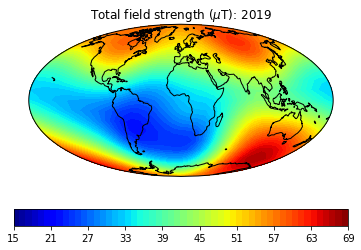

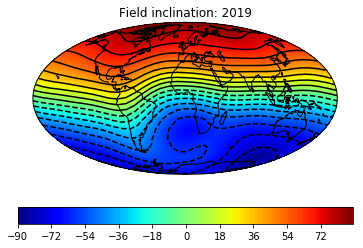

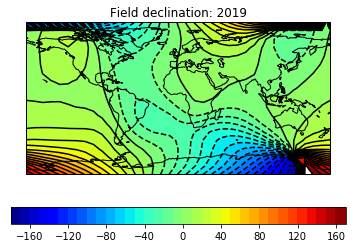

In [4]:
reload(pmagplotlib)
cmap='jet' # nice color map for contourf
pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',cmap=cmap,date=date,proj='Mollweide',contours=False) # plot the field strength
pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',cmap=cmap,date=date,proj='Mollweide',contours=True)# plot the inclination
pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',cmap=cmap,date=date,contours=True);# plot the declination    


figure saved as:  Intensity_0001.png
figure saved as:  Intensity_0002.png
figure saved as:  Intensity_0003.png
figure saved as:  Intensity_0004.png
figure saved as:  Intensity_0005.png
figure saved as:  Intensity_0006.png


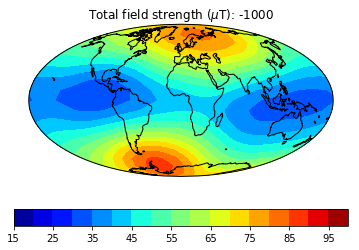

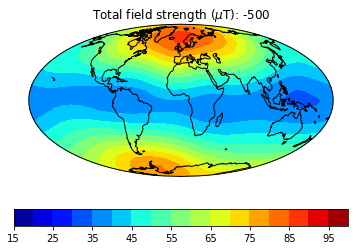

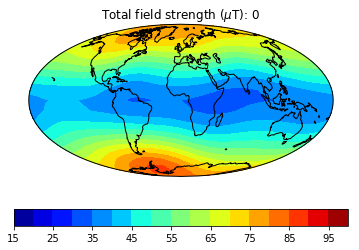

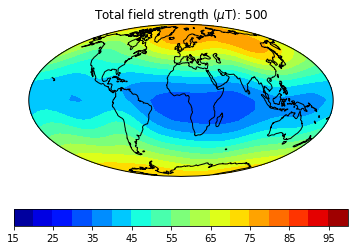

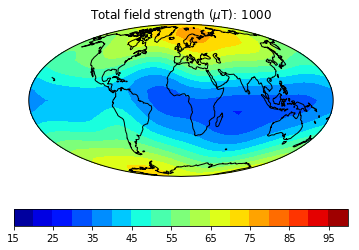

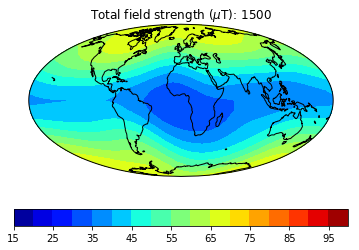

In [2]:
dir_path='MagIC_example_2'
files=os.listdir(dir_path)
for f in files:
    if '.png' in f:os.remove(dir_path+'/'+f)
mod,lon_0,alt,ghfile='cals10k.2',0,0,"" #
cmap,title='jet','Intensity' # nice color map for contourf
fignum=1
dates=range(-1000,2100,100) # make maps for these years.  
lon_0=0 # center the maps at the Greenwich meridian
element='B' # let's do field strength
for date in dates:  # step through the loop

    Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)
    pmagplotlib.plot_mag_map(fignum,Bs,lons,lats,'B',cmap=cmap,date=date,proj='Mollweide',
                             min=15,max=100,contours=False) # plot the field strength
    figstr=str(fignum)
    while len(figstr)<4:figstr='0'+figstr
    
    plt.savefig(dir_path+'/' +title.strip()+'_'+figstr+'.png') # saves the  figure. to a folder
    fignum+=1
    print ('figure saved as: ',title.strip()+'_'+figstr+'.png')

Now we can make the animated gif from these png files

In [3]:
filenames=sorted(os.listdir('MagIC_example_2/')) # listing of the directory
images = [] # make a container to put the image files in
for file in filenames: # step through all the maps
    if '.png' in file: # skip some of the nasty hidden files
        filename='MagIC_example_2/'+file # make filename from the folder name and the file name
        images.append(imageio.imread(filename)) # read it in and stuff in the container
kargs={ 'duration':.2} # .2 second delay between frames
imageio.mimsave('MagIC_example_2/Bmovie.gif', images,'GIF',**kargs) # save to an animated gif.  

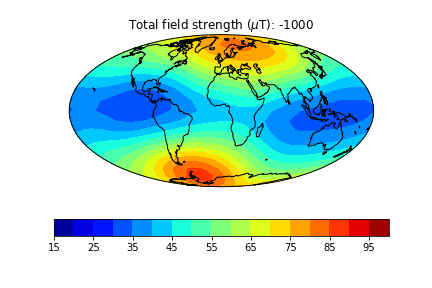

In [4]:
Image(filename="MagIC_example_2/Bmovie.gif")

## Exercise 3
- download the data from Tauxe et al. (2015; DOI: 0.1016/J.EPSL.2014.12.034) using the wget.download command as in Exercise 1.
- Move the downloaded data file to a directory called 'MagIC\_example\_3'

- Unpack it with ipmag.download_magic()
- make a figure with these elements for the interval 40 m to 160 m:
    - magstrat time scale plot from 2 to 7 Ma
    - inclinations (dir\_inc) from the 20mT step in the measurements table  against composite_depth as blue dots
    - inclinations (dir\_inc) from the specimens table against composite depth as red triangles. 
    - put on dotted lines for the GAD inclination
- use ipmag.ani_depthplot to plot the anisotropy data against depth in the Hole.  

### Download and unpack the data

- set the first if statement to True to download, move and unpack the data set from MagIC

In [4]:
dir_path='MagIC_example_3' # set the path to your working directory
depth_min, depth_max= 40, 160 # set the core depth bounds as required
# First get the file from MagIC into your working directory:

wget.download('https://earthref.org/MagIC/download/16749/magic_contribution_16749.txt')
    # move to the working directory
# and move it into the working directory:
os.rename('magic_contribution_16749.txt', dir_path+'/magic_contribution_16749.txt')
ipmag.download_magic(infile='magic_contribution_16749.txt',dir_path=dir_path)


working on:  'contribution'
1  records written to file  /Users/ltauxe/PmagPy/MagIC_example_3/contribution.txt
contribution  data put in  /Users/ltauxe/PmagPy/MagIC_example_3/contribution.txt
working on:  'locations'
1  records written to file  /Users/ltauxe/PmagPy/MagIC_example_3/locations.txt
locations  data put in  /Users/ltauxe/PmagPy/MagIC_example_3/locations.txt
working on:  'sites'
2404  records written to file  /Users/ltauxe/PmagPy/MagIC_example_3/sites.txt
sites  data put in  /Users/ltauxe/PmagPy/MagIC_example_3/sites.txt
working on:  'samples'
2436  records written to file  /Users/ltauxe/PmagPy/MagIC_example_3/samples.txt
samples  data put in  /Users/ltauxe/PmagPy/MagIC_example_3/samples.txt
working on:  'specimens'
2573  records written to file  /Users/ltauxe/PmagPy/MagIC_example_3/specimens.txt
specimens  data put in  /Users/ltauxe/PmagPy/MagIC_example_3/specimens.txt
working on:  'measurements'
4697  records written to file  /Users/ltauxe/PmagPy/MagIC_example_3/measurements

True

## Magstrat figure
- read in the data file as a Pandas DataFrame with pd.read_csv().  
    - All MagIC .txt files are tab delimited.  This is indicated with a sep='\t' keywork.  
    - The column headers in the second row, hence (because Python counts from zero), header=1
- the depth of a particular specimen/site in MagIC is stored in the sites.txt table.  You will have to merge the data from that table into the specimens/measurements tables.  To do that you need to do a few things:
    - you need a common key.  Because the specimen/sample/site names are the same for an IODP record, make a column in the specimen/measurements dataframes labled 'site' that is the same as the specimen.  
    - merge the two dataframes (sites and specimens/measurements) with pd.merge()

In [5]:
# read in the required data tables:
meas_df=pd.read_csv(dir_path+'/measurements.txt',sep='\t',header=1)
site_df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
spec_df=pd.read_csv(dir_path+'/specimens.txt',sep='\t',header=1)
ages_df=pd.read_csv(dir_path+'/ages.txt',sep='\t',header=1)
# filter the ages table for method codes that indicate paleomagnetic reversals:
ages_df=ages_df[ages_df['method_codes'].str.contains('PMAG')]
# filter the measurements for the 20 mT (.02 T) step
meas_df.dropna(subset=['treat_ac_field'],inplace=True)
meas_20mT=meas_df[meas_df['treat_ac_field']==0.02] 
# make the site key in the measurements and specimens dataframes
meas_20mT['site']=meas_20mT['specimen']
spec_df['site']=spec_df['specimen']
# we only want the core depth out of the sites dataframe, so we can pare it down like this:
depth_df=site_df[['site','core_depth']]
# merge the specimen, depth dataframes
spec_df=pd.merge(spec_df,depth_df,on='site')
# merge the measurements, depth dataframes
meas_20mT=pd.merge(meas_20mT,depth_df,on='site')
# filter for the desired depth range: 
spec_df=spec_df[(spec_df['core_depth']>depth_min)&(spec_df['core_depth']<depth_max)]
meas_20mT=meas_20mT[(meas_20mT['core_depth']>depth_min)&(meas_20mT['core_depth']<depth_max)]
# note that the age table has only height (not depth), so these numbers are the opposite
ages_df=ages_df[(ages_df['tiepoint_height']<-depth_min)&(ages_df['tiepoint_height']>-depth_max)]
# get the site latitude (there is only one)
lat=site_df['lat'].unique()[0]



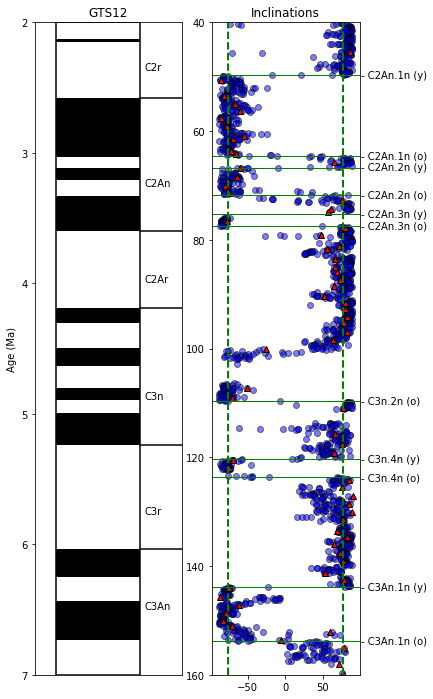

In [6]:
fig=plt.figure(1,(9,12)) # make the figure
ax1=fig.add_subplot(131) # make the first of three subplots
pmagplotlib.plot_ts(ax1,2,7,timescale='gts12') # plot on the time scale
ax2=fig.add_subplot(132) # make the second of three subplots
plt.plot(meas_20mT.dir_inc,meas_20mT.core_depth,'bo',markeredgecolor='black',alpha=.5)
plt.plot(spec_df.dir_inc,spec_df.core_depth,'r^',markeredgecolor='black')

plt.ylim(depth_max,depth_min)
# calculate the geocentric axial dipole field for the site latitude
gad=pmag.pinc(lat) # tan (I) = 2 tan (lat)
# put it on the plot as a green dashed line
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
pmagplotlib.label_tiepoints(ax2,100,ages_df.tiepoint.values,-1*ages_df.tiepoint_height.values,lines=True)
#

### "Christmas tree" of anisotropy
- use ipmag.ani\_depthplot()

In [7]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file='', sum_file='', fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.', contribution=None)
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option).
    You must provide valid specimens and sites files, and either a samples or an ages file.
    You may additionally provide measurements and a summary file (csv).
    
    Parameters
    ----------
    spec_file : str, default "specimens.txt"
    samp_file : str, default "samples.txt"
    meas_file : str, default "measurements.txt"
    site_file : str, default "sites.txt"
    age_file : str, default ""
    sum_file : str, default ""
    fmt : str, default "svg"
        format for figures, ["svg", "jpg", "pdf", "

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


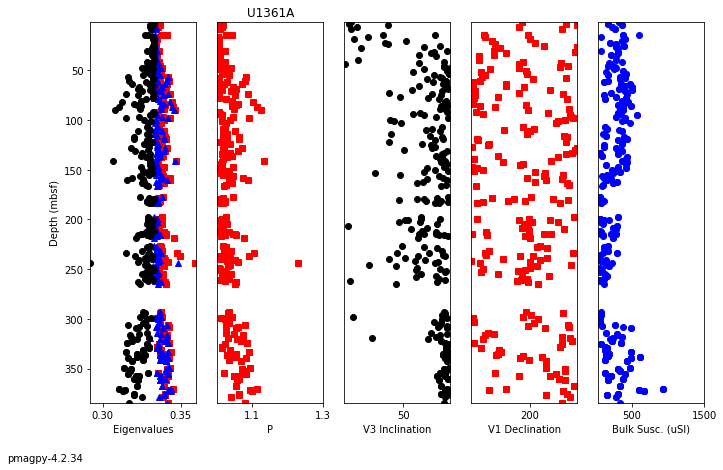

In [8]:
ipmag.ani_depthplot(dir_path=dir_path);